<a href="https://colab.research.google.com/github/adithisahu23/Decentralized-crowedfunding-platform-/blob/main/Drone_Surveillance_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

project_path = "/content/drive/MyDrive/Drone_Surveillance_AI"
os.makedirs(project_path, exist_ok=True)

project_path


'/content/drive/MyDrive/Drone_Surveillance_AI'

In [3]:
%cd /content/drive/MyDrive/Drone_Surveillance_AI


/content/drive/MyDrive/Drone_Surveillance_AI


In [4]:
with open("test_save.txt", "w") as f:
    f.write("My Drone Surveillance AI project is saved safely.")


In [5]:
!pip install ultralytics opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.3 MB/s eta 0:00:00


In [6]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

print("All libraries loaded successfully!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
All libraries loaded successfully!


In [7]:
video_path = "/input_video.mp4.mp4"

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("❌ Error: Video not loaded")
else:
    print("✅ Video loaded successfully")

✅ Video loaded successfully


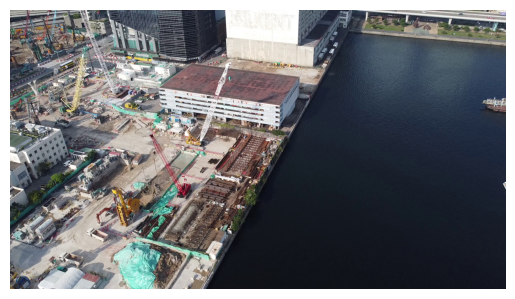

In [8]:
ret, frame = cap.read()

if ret:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.axis("off")
else:
    print("❌ Could not read frame")


In [9]:
model = YOLO("yolov8n.pt")  # n = nano (fast & free)
print("YOLO model loaded successfully!")


YOLO model loaded successfully!



0: 384x640 1 car, 364.2ms
Speed: 16.9ms preprocess, 364.2ms inference, 39.8ms postprocess per image at shape (1, 3, 384, 640)


(np.float64(-0.5), np.float64(2559.5), np.float64(1439.5), np.float64(-0.5))

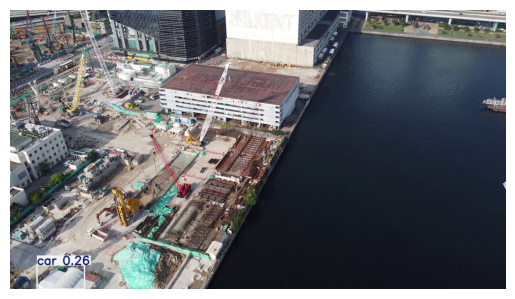

In [10]:
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()

results = model(frame)

annotated_frame = results[0].plot()

frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)
plt.axis("off")


In [11]:
TARGET_CLASSES = ["person", "car", "truck", "bus", "motorcycle"]

results = model(frame)

for box in results[0].boxes:
    cls_id = int(box.cls[0])
    cls_name = model.names[cls_id]
    if cls_name in TARGET_CLASSES:
        print(f"Detected: {cls_name}")



0: 384x640 1 car, 135.2ms
Speed: 4.1ms preprocess, 135.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Detected: car


In [12]:
import os

output_path = "output_surveillance.mp4"

cap = cv2.VideoCapture(video_path)

fps = int(cap.get(cv2.CAP_PROP_FPS))
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

print("Video writer ready!")


Video writer ready!


In [13]:
TARGET_CLASSES = ["person", "car", "truck", "bus", "motorcycle"]

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    annotated_frame = frame.copy()

    for box in results[0].boxes:
        cls_id = int(box.cls[0])
        cls_name = model.names[cls_id]

        if cls_name in TARGET_CLASSES:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf[0])

            label = f"{cls_name} {conf:.2f}"

            cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(
                annotated_frame,
                label,
                (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                (0, 255, 0),
                2
            )

    out.write(annotated_frame)

cap.release()
out.release()

print("✅ Video processing complete and saved!")



0: 384x640 1 car, 137.4ms
Speed: 5.8ms preprocess, 137.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 boat, 141.4ms
Speed: 5.9ms preprocess, 141.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 144.4ms
Speed: 4.1ms preprocess, 144.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 bench, 143.6ms
Speed: 7.3ms preprocess, 143.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 boat, 136.0ms
Speed: 4.4ms preprocess, 136.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 boat, 141.3ms
Speed: 4.0ms preprocess, 141.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 train, 1 boat, 141.5ms
Speed: 5.0ms preprocess, 141.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 boat, 136.5ms
Speed: 5.4ms preprocess, 136.5ms inference, 1.1ms postprocess per im

In [14]:
!ls


output_surveillance.mp4  test.mp4  test_save.txt  yolov8n.pt


In [15]:
# Restricted Area (x1, y1, x2, y2)
RESTRICTED_ZONE = (200, 150, 500, 400)


In [16]:
TARGET_CLASSES = ["person", "car", "truck", "bus", "motorcycle"]

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    annotated_frame = frame.copy()

    # Draw restricted area
    rx1, ry1, rx2, ry2 = RESTRICTED_ZONE
    cv2.rectangle(annotated_frame, (rx1, ry1), (rx2, ry2), (0, 0, 255), 2)
    cv2.putText(
        annotated_frame,
        "RESTRICTED AREA",
        (rx1, ry1 - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        (0, 0, 255),
        2
    )

    intrusion_detected = False

    for box in results[0].boxes:
        cls_id = int(box.cls[0])
        cls_name = model.names[cls_id]

        if cls_name in TARGET_CLASSES:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf[0])

            # Check intrusion
            if x1 > rx1 and y1 > ry1 and x2 < rx2 and y2 < ry2:
                intrusion_detected = True
                color = (0, 0, 255)  # red alert
            else:
                color = (0, 255, 0)  # normal

            label = f"{cls_name} {conf:.2f}"
            cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(
                annotated_frame,
                label,
                (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                color,
                2
            )

    # Intrusion Alert
    if intrusion_detected:
        cv2.putText(
            annotated_frame,
            "⚠ INTRUSION DETECTED!",
            (50, 50),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (0, 0, 255),
            3
        )

    out.write(annotated_frame)

cap.release()
out.release()

print("🚨 Intrusion detection video saved successfully!")


🚨 Intrusion detection video saved successfully!


output_surveillance.mp4


In [18]:
import os
os.makedirs("screenshots", exist_ok=True)


Drone_Surveillance_AI/
│
├── Drone_Surveillance_AI_Project.ipynb
├── input_video.mp4
├── output_surveillance.mp4
├── README.md
├── screenshots/
│   ├── detection.png
│   ├── intrusion.png


In [19]:
cv2.imwrite("screenshots/intrusion.png", annotated_frame)
print("Screenshot saved!")


Screenshot saved!


# AI-Powered Drone Surveillance & Intrusion Detection System

## Overview
This project simulates a defence surveillance system using Artificial
Intelligence and Computer Vision. It detects humans and vehicles from
aerial video footage and identifies intrusions in restricted zones.

## Features
- Object detection using YOLOv8
- Human and vehicle identification
- Restricted area intrusion detection
- Alert generation for security threats
- Fully software-based implementation

## Technologies Used
- Python
- OpenCV
- YOLOv8
- Google Colab

## Applications
- Defence surveillance
- Border monitoring
- Military reconnaissance
- Restricted area security

## How to Run
1. Open the notebook in Google Colab
2. Upload input video
3. Run cells step-by-step
4. View output video and alerts

## Author
B.Tech CSE Student
